In [1]:
import numpy as np
import matplotlib.pyplot as plt

import cbmos
import cbmos.force_functions as ff
import cbmos.solvers.euler_forward as ef
import cbmos.cell as cl

In [2]:
plt.style.use('seaborn-whitegrid')
plt.style.use('tableau-colorblind10')
params = {
         'legend.fontsize': 'xx-large',
         'figure.figsize': (6.75, 5),
         'lines.linewidth': 3.0,
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large',
         'font.size': 12}
plt.rcParams.update(params)

In [3]:
# Set initial cell configuration
n_x = 5
n_y = 5
cell_size = 0.5
coordinates = [(2*cell_size*i_x, 2*cell_size*i_y) for i_x in range(n_x) for i_y in range(n_y)]

# make cell_list for the sheet
sheet = [
    cl.Cell(
        i, # Cell ID, must be unique to each cell
        [x,y], # Initial coordinates
        -6.0, # Birthtime
        True, # Whether or not the cell is proliferating
        lambda t: 6 + t # Function generating the next division time
    )
    for i, (x, y) in enumerate(coordinates)]

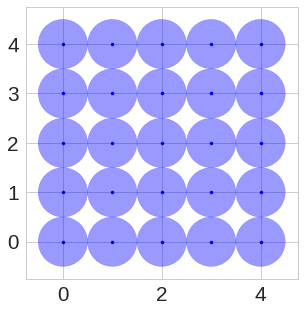

In [4]:
def plot_population(cell_list, color='blue'):
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    for cell in cell_list:
        ax.add_patch(plt.Circle(cell.position ,0.5,color=color, alpha=0.4))
        plt.plot(cell.position[0], cell.position[1], '.', color=color)
    ax.set_aspect('equal')
    plt.show()
    
plot_population(sheet)

In [5]:
# Simulation parameters
s = 1.0    # rest length
tf = 4.0  # final time
rA = 1.5   # maximum interaction distance
dim = 2

In [6]:
# Initialize solver
solver = cbmos.CBMModel(ff.Gls(), ef.solve_ivp, dim)

In [7]:
dt = 0.01
t_data = np.arange(0, tf, dt)

t_data, history = solver.simulate(
    sheet, # Initial cell configuration
    t_data, # Times at which the history is saved
    {"mu": 5.70, "s": s, "rA": rA}, # Force parameters
    {'dt': dt}, # Solver parameters
)

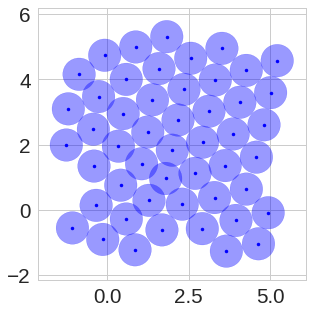

In [8]:
plot_population(history[-1])